In [342]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score 

In [343]:
abbrev = pd.read_csv("data/abbrev.csv")
abbrev.columns

Index(['Unnamed: 0', 'household_size', 'empl_agriculture', 'empl_professional',
       'empl_social', 'empl_services', 'empl_manufacturing', 'empl_retail',
       'prc_fam_poverty', 'avg_income', 'prc_public_transp', 'population',
       'pop_65_plus', 'health_ins', 'county', 'state', 'area',
       'domestic_passengers', 'intl_passengers', 'deaths', 'ten_plus', 'order',
       'density', 'death_prc'],
      dtype='object')

In [344]:
abbrev = abbrev.drop('Unnamed: 0', axis=1)

In [345]:
predictors = ['household_size', 'empl_agriculture', 'empl_professional','empl_social', 'empl_services', 'empl_manufacturing', 'empl_retail',
              'prc_fam_poverty', 'avg_income', 'prc_public_transp', 'population', 'pop_65_plus', 'health_ins', 'area', 
              'domestic_passengers', 'intl_passengers', 'ten_plus', 'order', 'density']

In [142]:
import rpy2.robjects as robjects
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


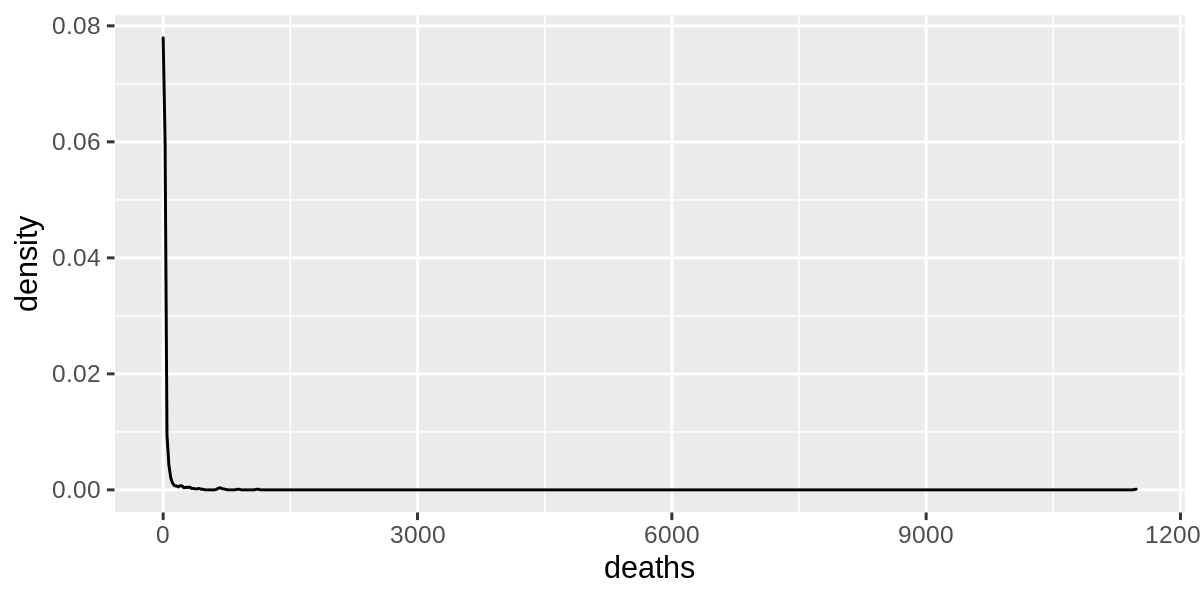

In [144]:
%%R -i abbrev -w 6 -h 3 --units in -r 200

library(ggplot2)
ggplot(abbrev, aes(deaths)) + geom_density()

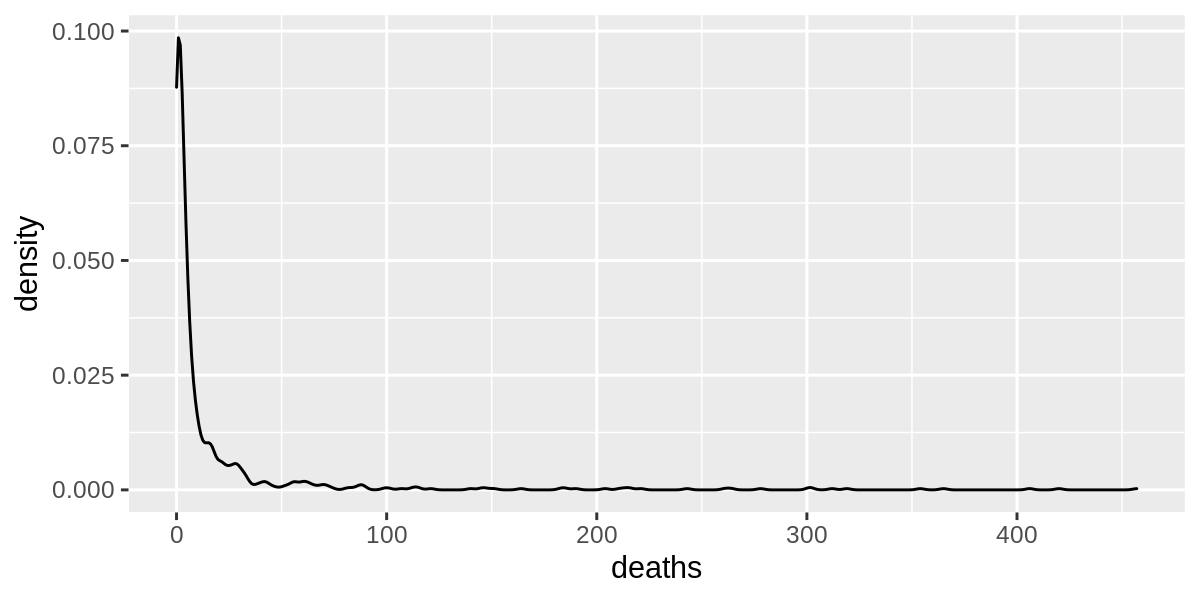

In [145]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev[abbrev$deaths < 600,], aes(deaths)) + geom_density()

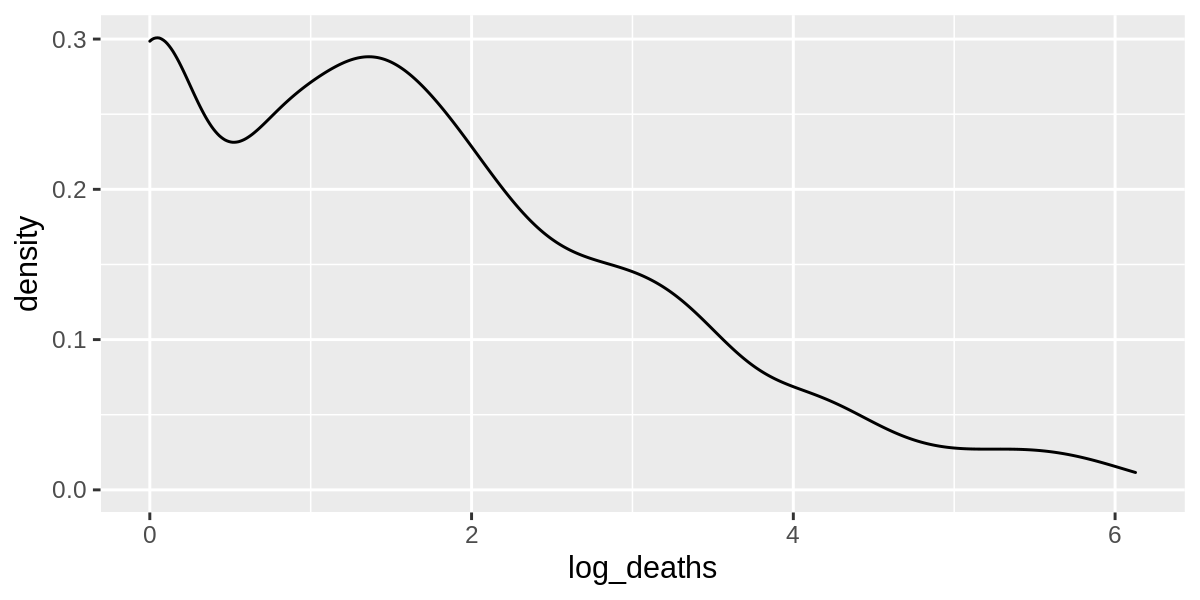

In [146]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev[abbrev$deaths < 600,], aes(log_deaths)) + geom_density()

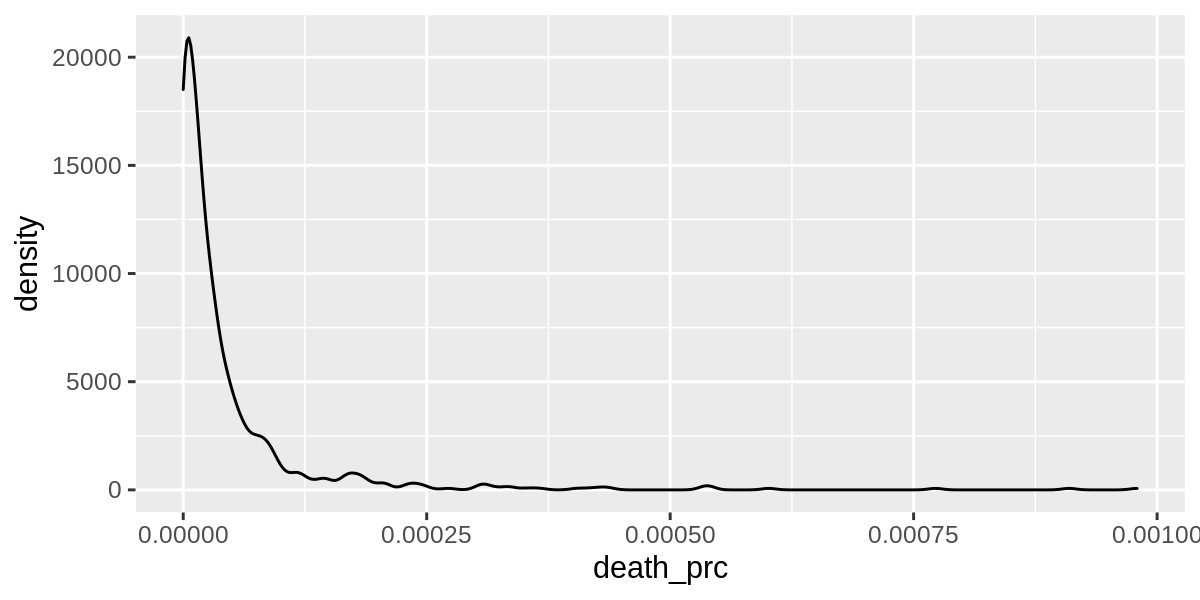

In [147]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev[abbrev$deaths < 600,], aes(death_prc)) + geom_density()

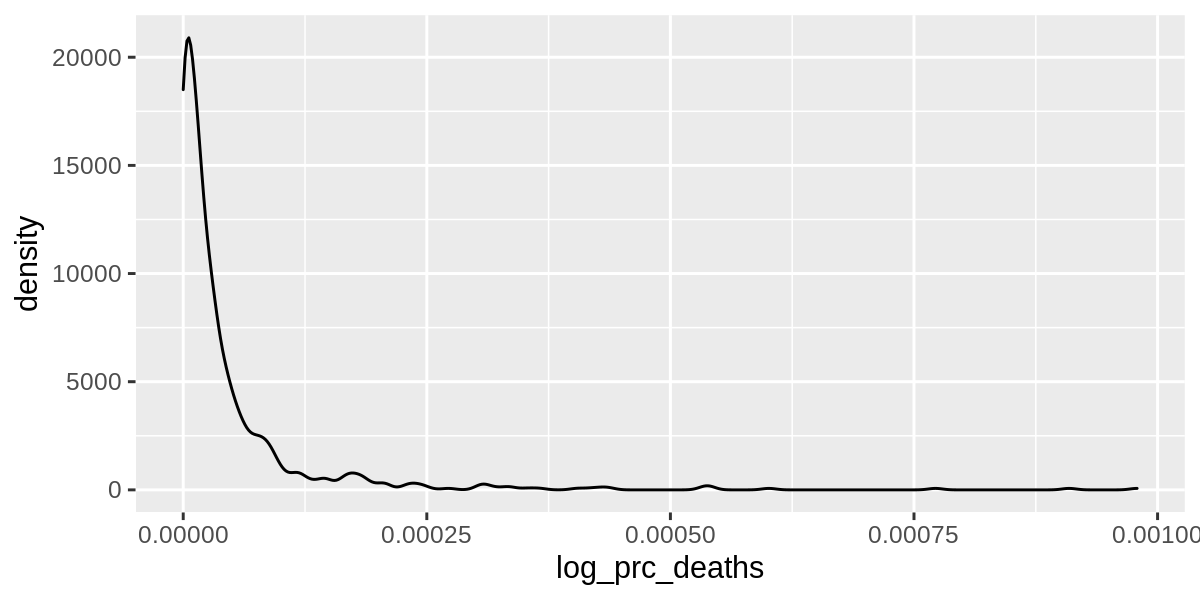

In [148]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev[abbrev$deaths < 600,], aes(log_prc_deaths)) + geom_density()

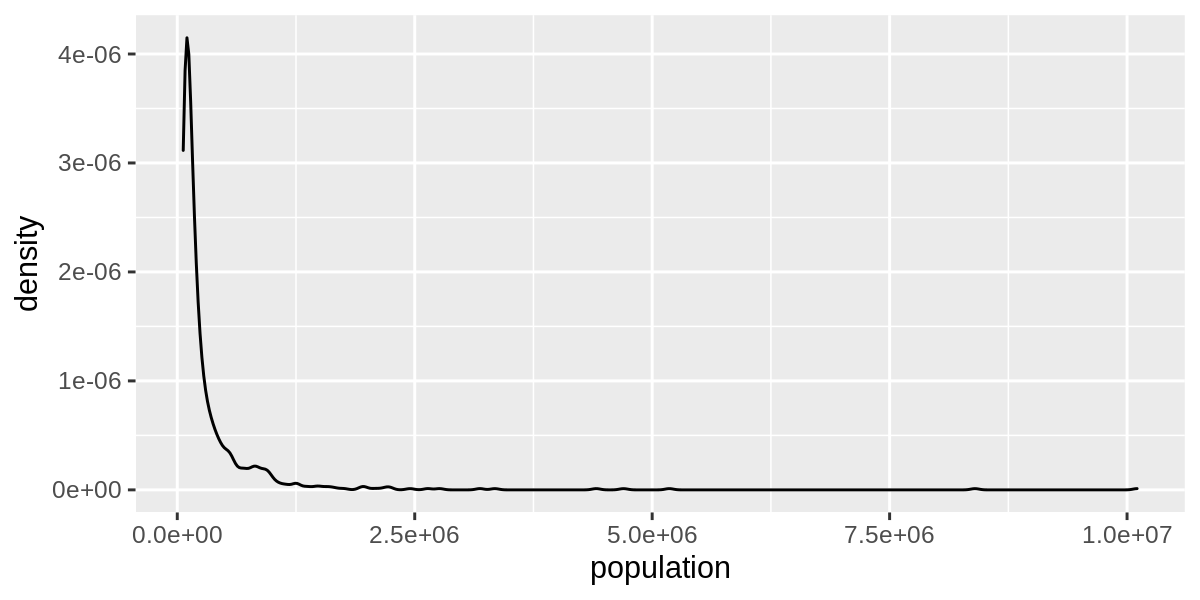

In [153]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(population)) + geom_density()
# try log-transforming population

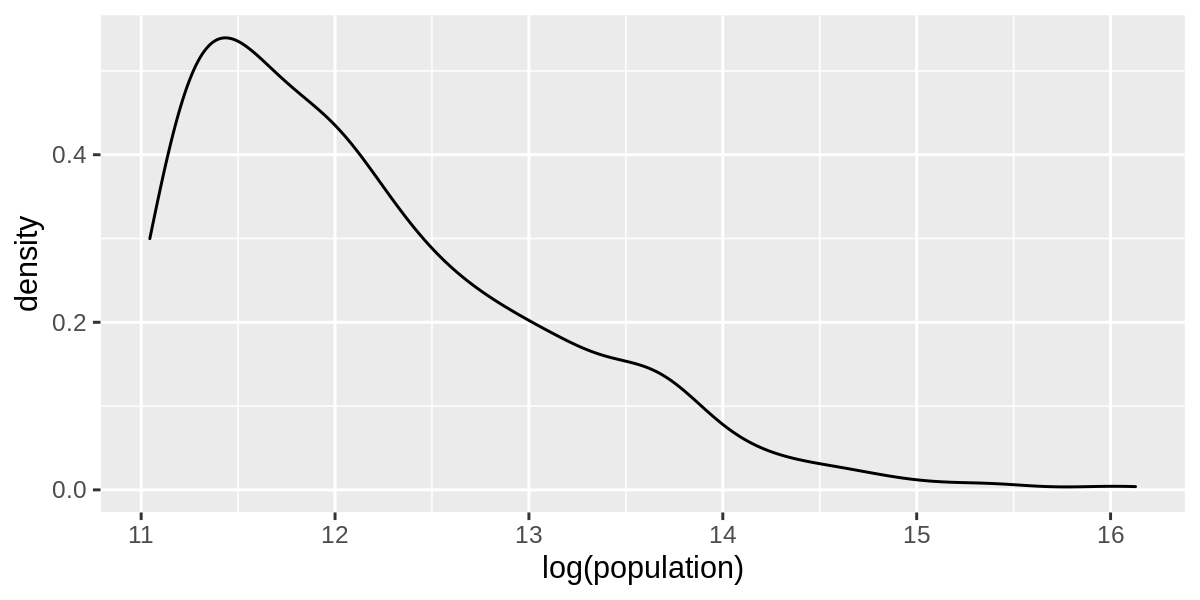

In [154]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(log(population))) + geom_density()

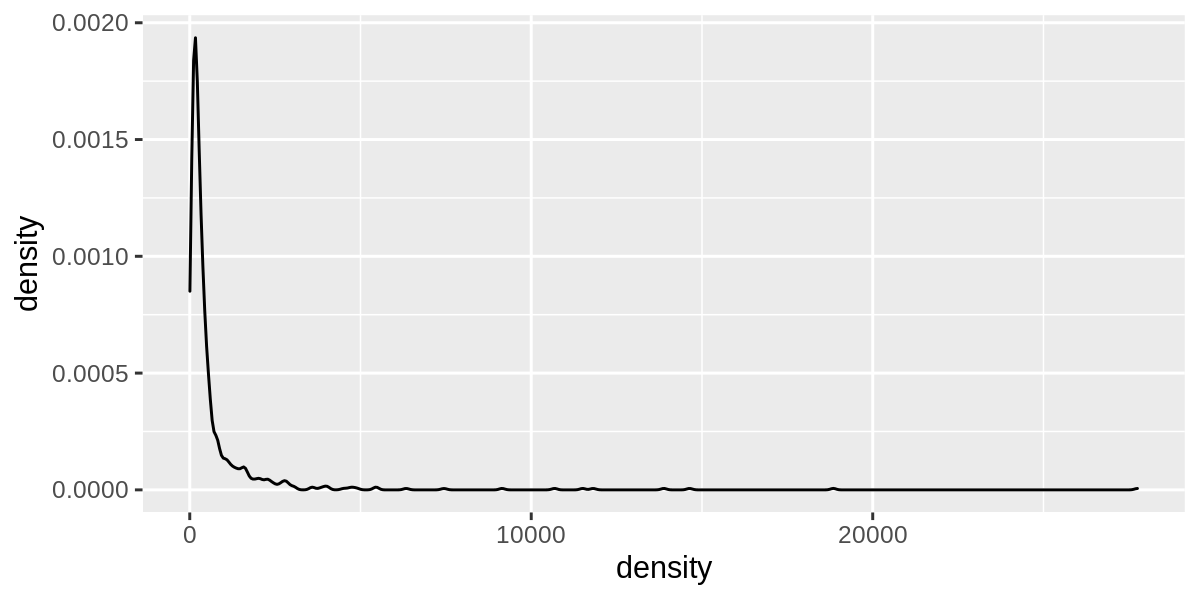

In [155]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(density)) + geom_density()

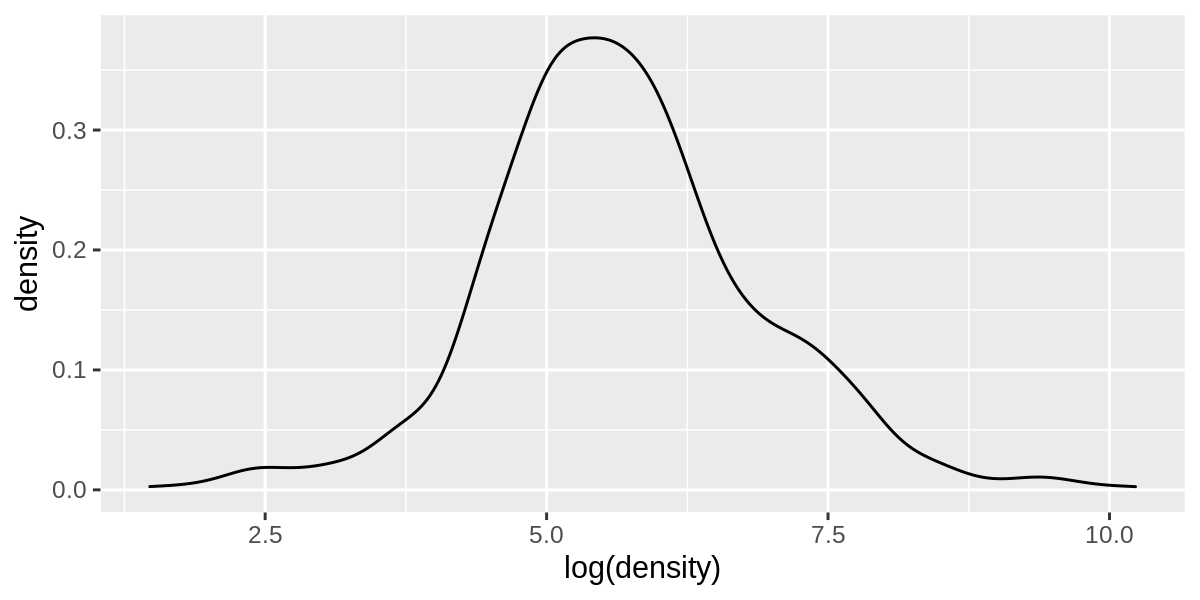

In [156]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(log(density))) + geom_density()
# much more normal! try log transforming density, too

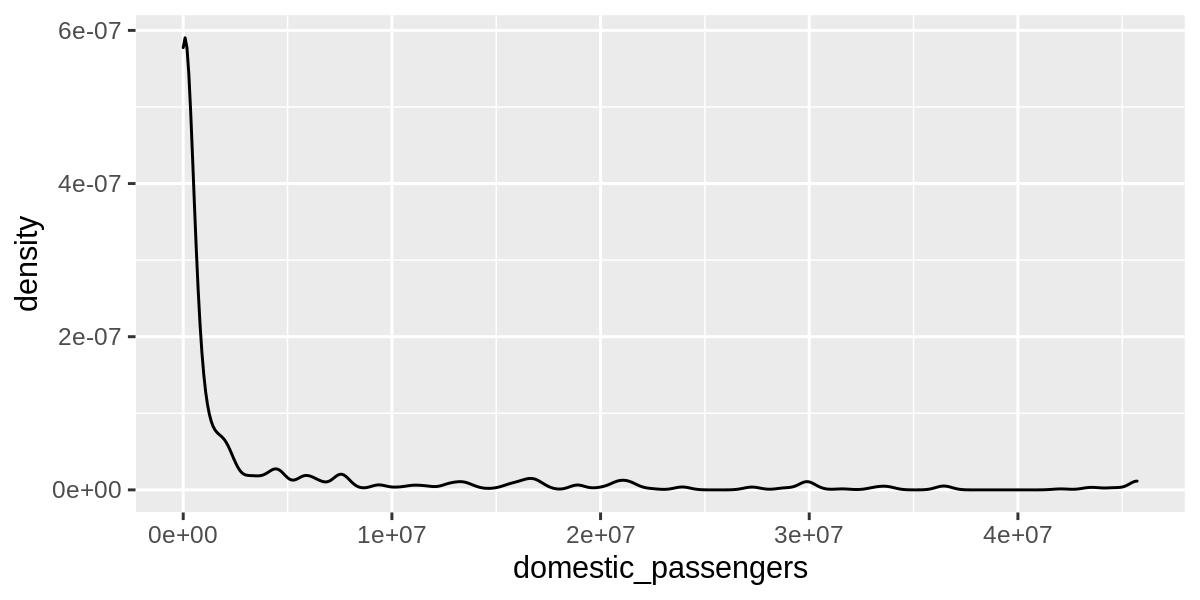

In [164]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(domestic_passengers)) + geom_density()
# log transform domestic_passengers, too

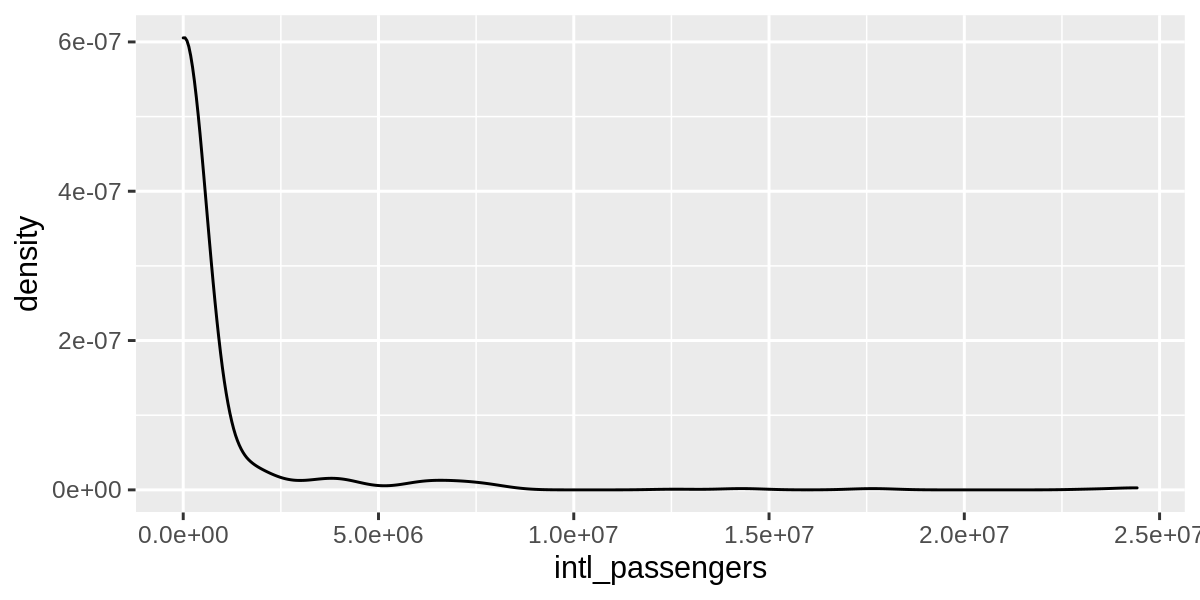

In [167]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(intl_passengers)) + geom_density()
# and international passengers

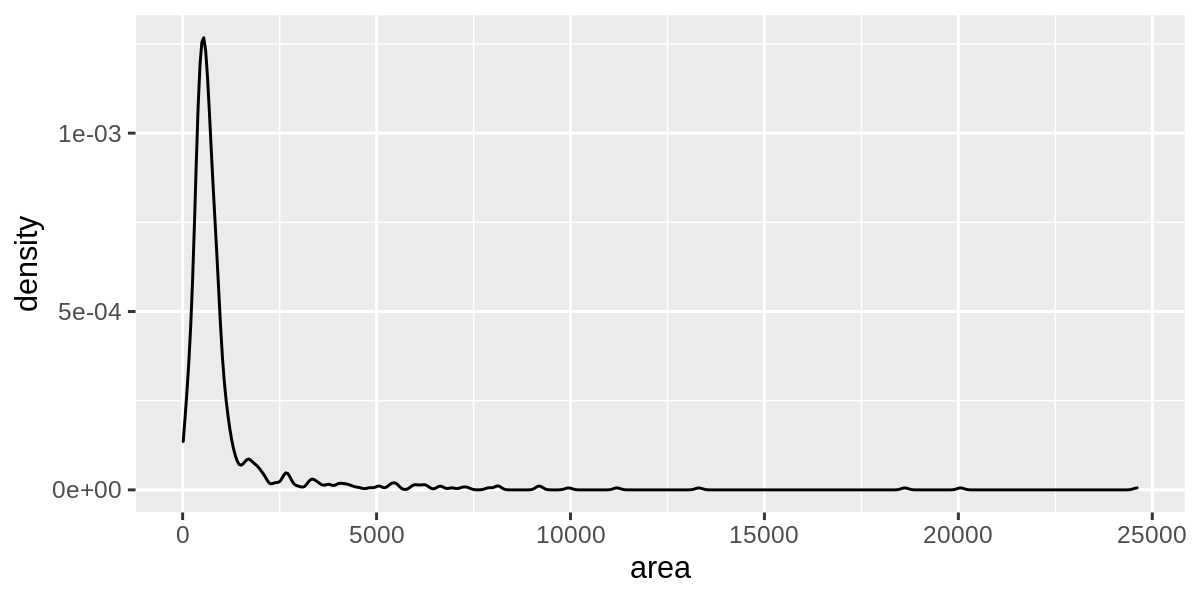

In [300]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(area)) + geom_density()
# and area

In [301]:
transform = ["population", "density", "intl_passengers", "domestic_passengers", "area"]
for field in transform:
    abbrev["log_"+field] = np.log1p(abbrev[field])

In [302]:
abbrev.columns

Index(['household_size', 'empl_agriculture', 'empl_professional',
       'empl_social', 'empl_services', 'empl_manufacturing', 'empl_retail',
       'prc_fam_poverty', 'avg_income', 'prc_public_transp', 'population',
       'pop_65_plus', 'health_ins', 'county', 'state', 'area',
       'domestic_passengers', 'intl_passengers', 'deaths', 'ten_plus', 'order',
       'density', 'death_prc', 'log_population', 'log_density',
       'log_intl_passengers', 'log_domestic_passengers', 'log_area'],
      dtype='object')

In [303]:
log_predictors = predictors.copy()
for field in transform:
    log_predictors.remove(field)
    log_predictors.append("log_"+field)
log_predictors

['household_size',
 'empl_agriculture',
 'empl_professional',
 'empl_social',
 'empl_services',
 'empl_manufacturing',
 'empl_retail',
 'prc_fam_poverty',
 'avg_income',
 'prc_public_transp',
 'pop_65_plus',
 'health_ins',
 'ten_plus',
 'order',
 'log_population',
 'log_density',
 'log_intl_passengers',
 'log_domestic_passengers',
 'log_area']

### Linear Regression

In [183]:
lrm = LinearRegression().fit(abbrev[predictors], abbrev["deaths"])
lrm.score(abbrev[predictors], abbrev["deaths"])

0.5403920042426926

In [304]:
lrm = LinearRegression().fit(abbrev[log_predictors], abbrev["deaths"])
lrm.score(abbrev[log_predictors], abbrev["deaths"])

0.34698451119769835

In [305]:
lrm = LinearRegression().fit(abbrev[predictors], abbrev["deaths"])

for a,b in zip(predictors, lrm.coef_):
    print(a, "\t", b)

household_size 	 115.95709883195428
empl_agriculture 	 2.5477774686607457
empl_professional 	 -20.003820783626665
empl_social 	 4.016586429039813
empl_services 	 0.6400616797591493
empl_manufacturing 	 -0.9635700158129368
empl_retail 	 0.8375083205871755
prc_fam_poverty 	 -12.11470113603042
avg_income 	 -0.0036843729843611854
prc_public_transp 	 -4.696542336566381
population 	 0.00022790044159303003
pop_65_plus 	 6.9275122428643225
health_ins 	 -0.04239021401938824
area 	 -0.0081566743535013
domestic_passengers 	 -1.2598896511703472e-05
intl_passengers 	 4.7289199641595255e-05
ten_plus 	 -3.2936825453555185
order 	 -0.7905764492253786
density 	 0.14019582407334388


In [306]:
lrm = LinearRegression().fit(abbrev[predictors], abbrev["death_prc"])
lrm.score(abbrev[predictors], abbrev["death_prc"])

0.4176098844380915

In [307]:
lrm = LinearRegression().fit(abbrev[log_predictors], abbrev["death_prc"])
lrm.score(abbrev[log_predictors], abbrev["death_prc"])

0.3607750943689385

In [308]:
ttr = TransformedTargetRegressor(regressor=LinearRegression(), func=np.log1p, inverse_func=np.expm1)
ttr.fit(abbrev[predictors], abbrev["deaths"])

TransformedTargetRegressor(check_inverse=True, func=<ufunc 'log1p'>,
                           inverse_func=<ufunc 'expm1'>,
                           regressor=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           transformer=None)

In [309]:
ttr.score(abbrev[predictors], abbrev["deaths"])

-7.260590395718831

In [310]:
ttr = TransformedTargetRegressor(regressor=LinearRegression(), func=np.log1p, inverse_func=np.expm1)
ttr.fit(abbrev[predictors], abbrev["death_prc"])
ttr.score(abbrev[predictors], abbrev["death_prc"])

0.41763798368193605

In [311]:
ttr = TransformedTargetRegressor(regressor=LinearRegression(), func=np.log1p, inverse_func=np.expm1)
ttr.fit(abbrev[log_predictors], abbrev["deaths"])
ttr.score(abbrev[log_predictors], abbrev["deaths"])
# much better!!

0.7934189414901935

In [312]:
ttr = TransformedTargetRegressor(regressor=LinearRegression(), func=np.log1p, inverse_func=np.expm1)
ttr.fit(abbrev[log_predictors], abbrev["death_prc"])
ttr.score(abbrev[log_predictors], abbrev["death_prc"])

0.3608041866899482

In [313]:
# use the one with r2=0.795 (log predictors, dependent variable=deaths)
ttr = TransformedTargetRegressor(regressor=LinearRegression(), func=np.log1p, inverse_func=np.expm1)
ttr.fit(abbrev[log_predictors], abbrev["deaths"])
for a, b in zip(log_predictors, ttr.regressor_.coef_):
    print(a, "\t", b)

household_size 	 -0.047168621497743014
empl_agriculture 	 -0.006770893010236208
empl_professional 	 -0.06244042019748084
empl_social 	 -0.010133185347525593
empl_services 	 -0.05146766291286825
empl_manufacturing 	 0.0006382630781590331
empl_retail 	 -0.007327653352072305
prc_fam_poverty 	 0.036870837210419484
avg_income 	 1.0820707126274973e-05
prc_public_transp 	 0.045356078813501184
pop_65_plus 	 0.028818440525901833
health_ins 	 0.02542610073040911
ten_plus 	 0.07367850082873212
order 	 0.02282223202102184
log_population 	 -0.6810613037247956
log_density 	 1.412229287979323
log_intl_passengers 	 0.012413275245611827
log_domestic_passengers 	 -0.003138816983235325
log_area 	 1.2328815452775972


In [314]:
exam = abbrev.copy()
exam["fitted"] = ttr.regressor_.predict(abbrev[log_predictors])
exam["pred"] = ttr.inverse_func(ttr.regressor_.predict(abbrev[log_predictors]))

In [315]:
exam[["pred", "deaths"]].describe()

,pred,deaths
count,823.000000,823.000000
mean,21.107095,38.071689
std,229.704501,408.374275
min,-0.674575,0.000000
25%,1.517516,1.000000
50%,3.851131,3.000000
75%,9.351159,13.000000
max,6511.087140,11477.000000


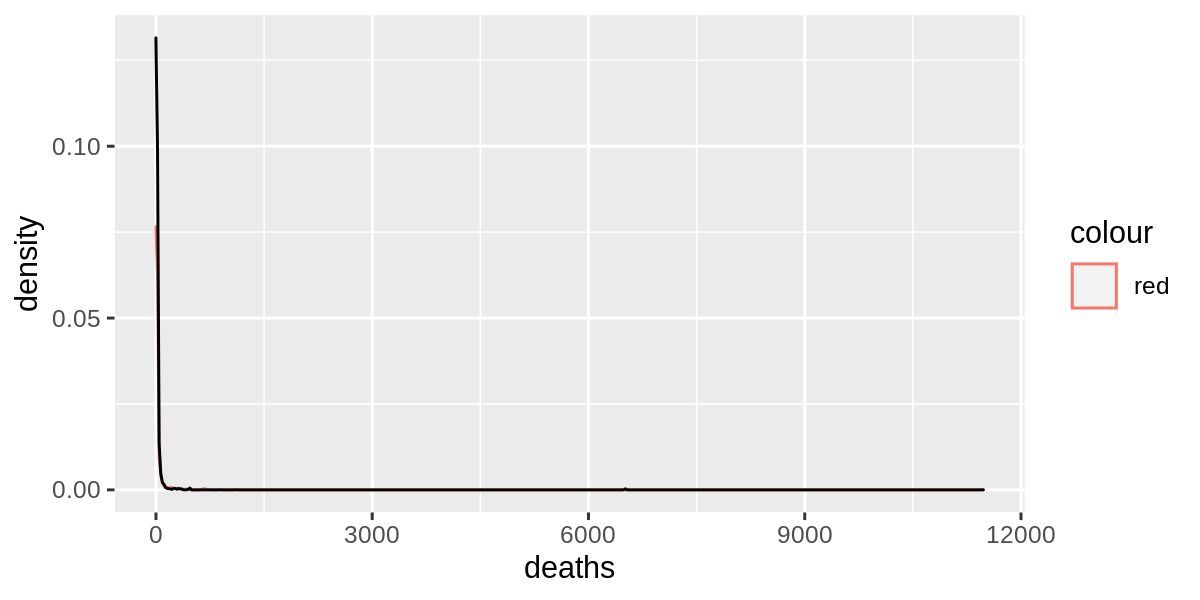

In [317]:
%%R -i exam -w 6 -h 3 --units in -r 200

ggplot(exam) + geom_density(aes(deaths, color="red")) + geom_density(aes(pred))

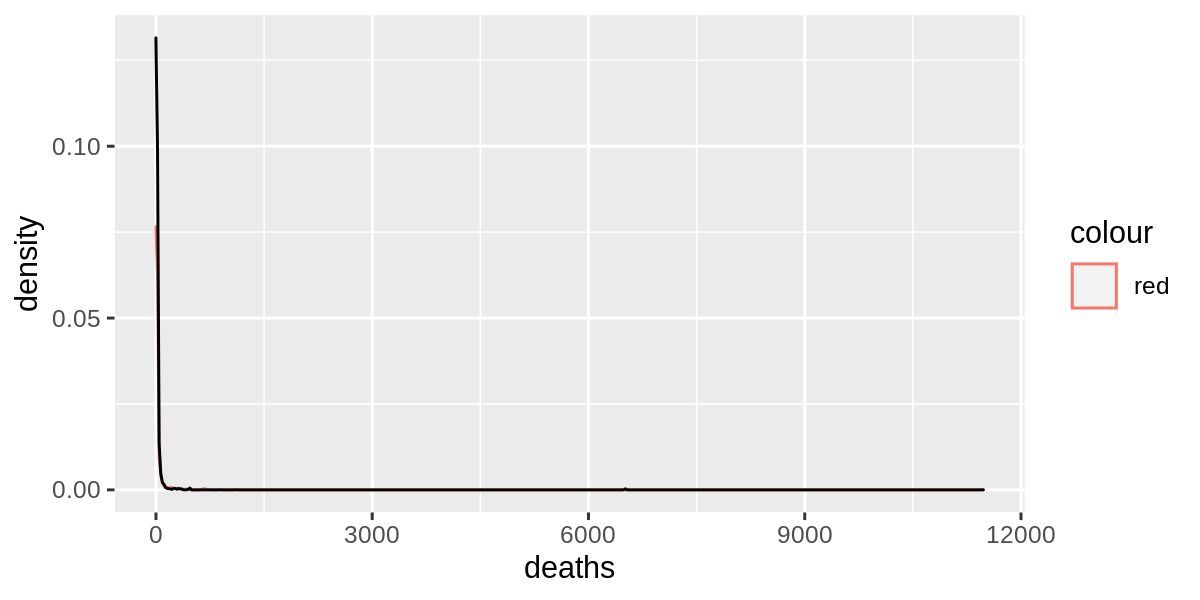

In [318]:
%%R -i exam -w 6 -h 3 --units in -r 200

ggplot(exam) + geom_density(aes(deaths, color="red")) + geom_density(aes(pred))

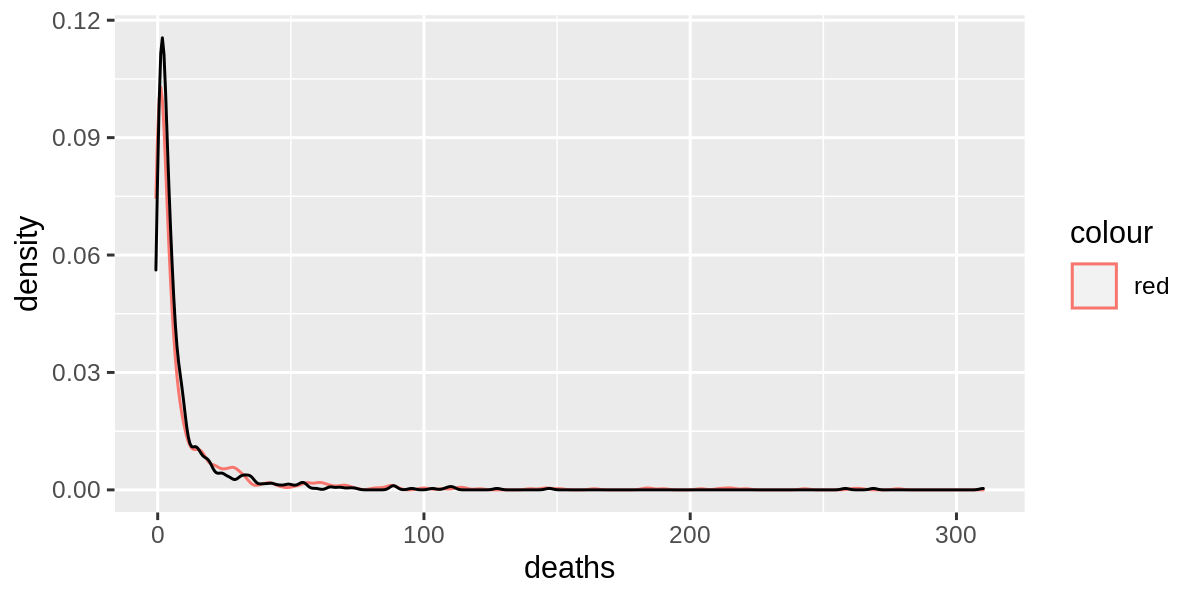

In [319]:
%%R -i exam -w 6 -h 3 --units in -r 200

ggplot(exam[exam$deaths < 300,]) + geom_density(aes(deaths, color="red")) + geom_density(aes(pred))

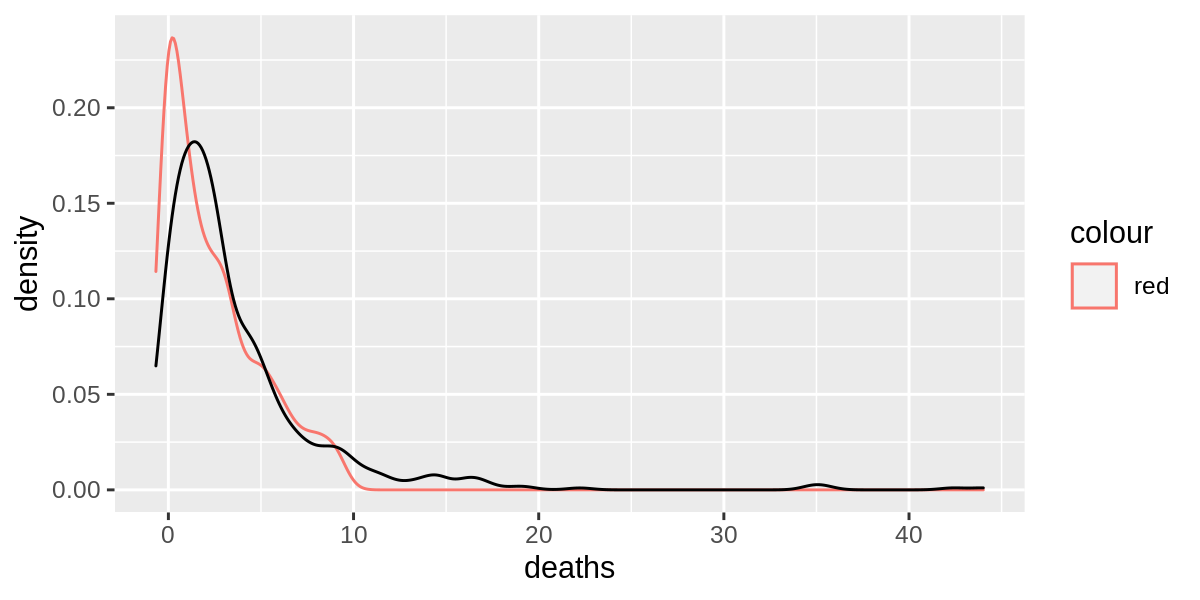

In [320]:
%%R -i exam -w 6 -h 3 --units in -r 200

ggplot(exam[exam$deaths < 10,]) + geom_density(aes(deaths, color="red")) + geom_density(aes(pred))

In [321]:
# check the model using R-style plots
# https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/
# https://medium.com/@vikashrajluhaniwal/simulating-replicating-r-regression-plot-in-python-using-sklearn-4ee48a15b67

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [322]:
exam["residuals"] = exam["deaths"] - exam["pred"]

In [323]:
exam[["residuals", "deaths", "pred"]].describe()

,residuals,deaths,pred
count,823.000000,823.000000,823.000000
mean,16.964594,38.071689,21.107095
std,184.833120,408.374275,229.704501
min,-293.079074,0.000000,-0.674575
25%,-2.107730,1.000000,1.517516
50%,-0.021052,3.000000,3.851131
75%,2.956551,13.000000,9.351159
max,4965.912860,11477.000000,6511.087140


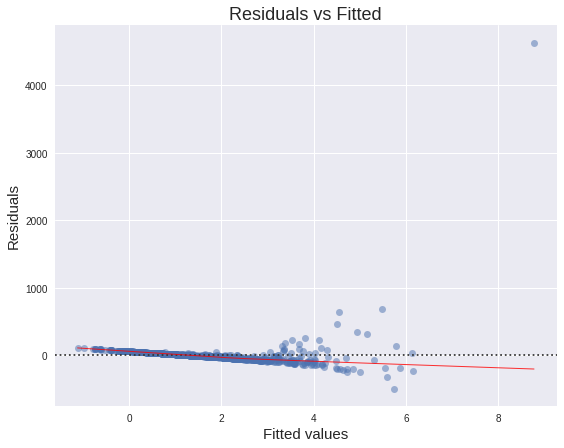

In [324]:
plot_lm_1 = plt.figure(figsize=(9,7))
plot_lm_1.axes[0] = sns.residplot(exam["fitted"], exam["residuals"], data=exam,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

# heteroskedasticity!! 
# https://online.stat.psu.edu/stat462/node/124/
# https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/

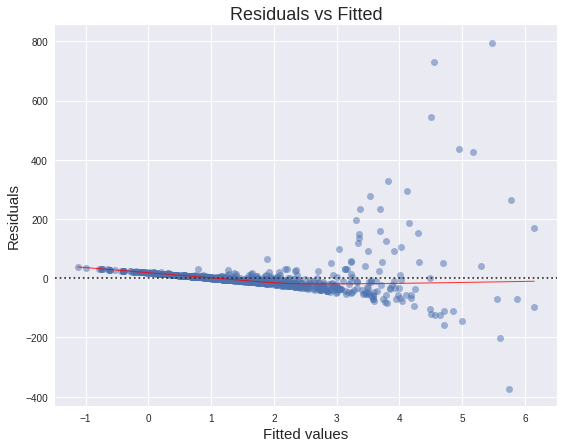

In [325]:
plot_lm_1 = plt.figure(figsize=(9,7))
plot_lm_1.axes[0] = sns.residplot(exam.loc[exam["deaths"]<5000,"fitted"], 
                                  exam.loc[exam["deaths"]<5000,"residuals"], 
                                  data=exam.loc[exam["deaths"]<5000,],
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

# looking at the same (still heterskedasticitic) when removing NY County (a spectacular outlier)

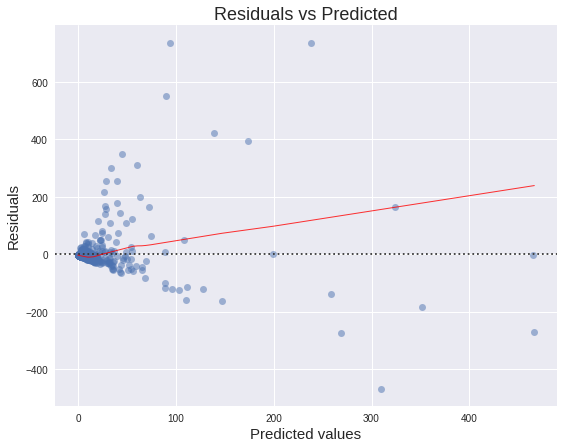

In [326]:
plot_lm_1 = plt.figure(figsize=(9,7))
plot_lm_1.axes[0] = sns.residplot(exam.loc[exam["deaths"]<5000,"pred"], 
                                  exam.loc[exam["deaths"]<5000,"residuals"], 
                                  data=exam.loc[exam["deaths"]<5000,],
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Predicted')
plot_lm_1.axes[0].set_xlabel('Predicted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

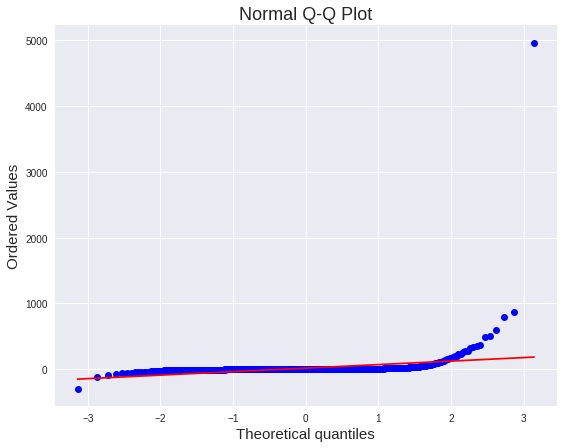

In [327]:
plt.figure(figsize=(9,7))
stats.probplot(exam["residuals"], dist="norm", 
                                   plot=plt)

plt.title('Normal Q-Q Plot');

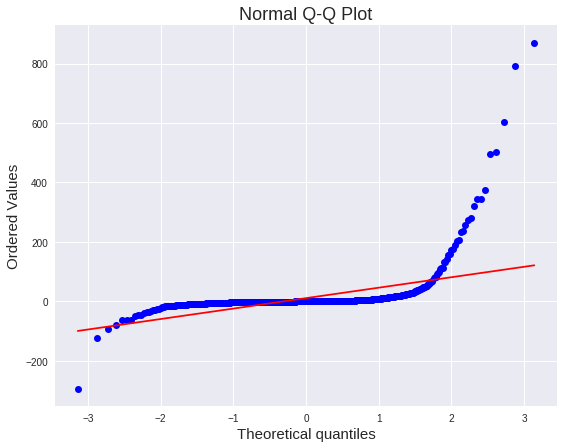

In [328]:
plt.figure(figsize=(9,7))
stats.probplot(exam.loc[exam["county"] != "New York County","residuals"], dist="norm", 
                                   plot=plt)

plt.title('Normal Q-Q Plot');
# without NYC

Text(0.5, 0, 'Fitted value')

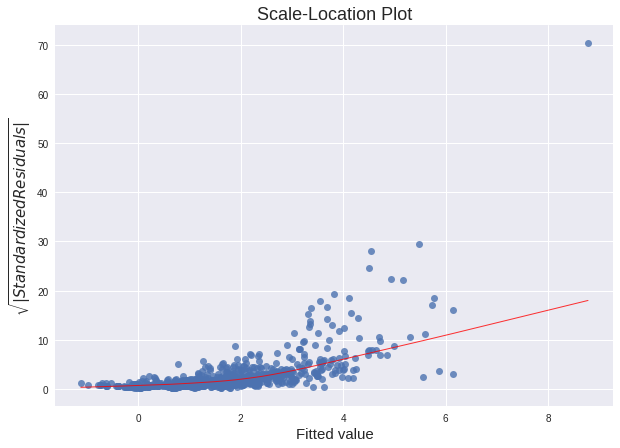

In [329]:
exam["norm_residuals_abs_sqrt"]=np.sqrt(np.abs(exam["residuals"]))

plt.figure(figsize=(10,7))
sns.regplot(exam["fitted"], exam["norm_residuals_abs_sqrt"],
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title("Scale-Location Plot")
plt.ylabel("$\sqrt{|Standardized Residuals|}$")
plt.xlabel("Fitted value")

### Elastic Net

In [330]:
encv = ElasticNetCV(normalize=True, max_iter=60000, random_state=101, cv=5)
encv.fit(abbrev[predictors], abbrev["deaths"])

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=60000, n_alphas=100, n_jobs=None,
             normalize=True, positive=False, precompute='auto',
             random_state=101, selection='cyclic', tol=0.0001, verbose=0)

In [331]:
encv.score(abbrev[predictors], abbrev["deaths"])
# nowhere near .795

# with cv=5, r2=0.196
# with cv=3, r2=0.158
# with cv=7, r2=0.196
# with cv=10, r2=0.196

0.19587609278319784

In [332]:
# try without outlier NYC (collapsed into NY County)
encv = ElasticNetCV(normalize=True, max_iter=6000, random_state=1001, cv=5)
encv.fit(abbrev.loc[abbrev["county"] != "New York County", predictors], 
        abbrev.loc[abbrev["county"] != "New York County", "deaths"])
encv.score(abbrev.loc[abbrev["county"] != "New York County", predictors], 
          abbrev.loc[abbrev["county"] != "New York County", "deaths"])
# slightly better

0.36338563645011845

In [333]:
ttr_encv = TransformedTargetRegressor(regressor=ElasticNetCV(normalize=True, 
                                                            max_iter=6000, 
                                                            random_state=1001, cv=3), 
                                      func=np.log1p, inverse_func=np.expm1)
ttr_encv.fit(abbrev[predictors], abbrev["deaths"])
ttr_encv.score(abbrev[predictors], abbrev["deaths"])
# yikes

-6.915624696448504

In [334]:
# try with log-transformed independent variables + transformed dependent variable
ttr_encv = TransformedTargetRegressor(regressor=ElasticNetCV(normalize=True, 
                                                            max_iter=6000, 
                                                            random_state=1001, cv=3), 
                                      func=np.log1p, inverse_func=np.expm1)
ttr_encv.fit(abbrev[log_predictors], abbrev["deaths"])

TransformedTargetRegressor(check_inverse=True, func=<ufunc 'log1p'>,
                           inverse_func=<ufunc 'expm1'>,
                           regressor=ElasticNetCV(alphas=None, copy_X=True,
                                                  cv=3, eps=0.001,
                                                  fit_intercept=True,
                                                  l1_ratio=0.5, max_iter=6000,
                                                  n_alphas=100, n_jobs=None,
                                                  normalize=True,
                                                  positive=False,
                                                  precompute='auto',
                                                  random_state=1001,
                                                  selection='cyclic',
                                                  tol=0.0001, verbose=0),
                           transformer=None)

In [335]:
ttr_encv.score(abbrev[log_predictors], abbrev["deaths"])
# better than the non-transformed dependent variable training

0.6006040675163059

#### ElasticNet with GridSearchCV

In [336]:
param_grid = [{'l1_ratio':[0.1, 0.3, 0.5, 0.7, 0.9]}]
enm = ElasticNet(normalize=True, max_iter=60000, random_state=1001)
scorer = make_scorer(r2_score)
search = GridSearchCV(enm, param_grid, cv=3, scoring=scorer).fit(abbrev[predictors], abbrev["deaths"])

In [337]:
search

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=60000, normalize=True,
                                  positive=False, precompute=False,
                                  random_state=1001, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(r2_score), verbose=0)

In [338]:
search.best_estimator_ 

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=60000, normalize=True, positive=False, precompute=False,
           random_state=1001, selection='cyclic', tol=0.0001, warm_start=False)

In [339]:
search.best_score_
# yikes, not good, ElasticNetCV 
# with CV=10 l1_ratio=0.9, score=0.0373
# with CV=5 l1_ratio=0.9, score=0.0544
# with CV=3 l1_ratio=0.9, score=0.0793

0.07931775070155091

In [340]:
# try transformed target model with l1_ratio found in grid search

ttr_encv = TransformedTargetRegressor(regressor=ElasticNetCV(l1_ratio=0.9,
                                                             normalize=True, 
                                                             max_iter=6000, 
                                                             random_state=1001, cv=3), 
                                      func=np.log1p, inverse_func=np.expm1)
ttr_encv.fit(abbrev[predictors], abbrev["deaths"])
ttr_encv.score(abbrev[predictors], abbrev["deaths"])

-4.263819357230257

In [341]:
ttr_encv = TransformedTargetRegressor(regressor=ElasticNetCV(l1_ratio=0.9,
                                                             normalize=True, 
                                                             max_iter=6000, 
                                                             random_state=1001, cv=3), 
                                      func=np.log1p, inverse_func=np.expm1)
ttr_encv.fit(abbrev[log_predictors], abbrev["deaths"])
ttr_encv.score(abbrev[log_predictors], abbrev["deaths"])

# not too far off from the default l1_ratio (0.5)

0.5711049430879876

### TransformedTargetRegressor

+ https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html
+ https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html#sklearn.compose.TransformedTargetRegressor